# Bank Loan Proect
## PROBLEM STATEMENT
## BRD 1: SUMMARY
### Key Performance Indicators (KPIs) Requirements:
* **1.Total Loan Applications**: We need to calculate the total number of loan applications received during a specified period. Additionally, it is essential to monitor the Month-to-Date (MTD) Loan Applications.
* **2.Total Funded Amount**: Understanding the total amount of funds disbursed as loans is crucial. We also want to keep an eye on the MTD Total Funded Amount metric.
* **3.Total Amount Received**: Tracking the total amount received from borrowers is essential for assessing the bank's cash flow and loan repayment. We should analyse the Month-to-Date (MTD) Total Amount Receive.
* **4.Average Interest Rate**: Calculating the average interest rate across all loans which will provide insights into our lending portfolio's overall cost.
* **5.Average Debt-to-Income Ratio (DTI)**: Evaluating the average DTI for our borrowers helps us gauge their financial health. We need to compute the average DTI for all loans.



### Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
df = pd.read_excel("financial_loan.xlsx")
df.head()

,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,...,sub_grade,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
0,1077430,GA,INDIVIDUAL,< 1 year,Ryder,C,RENT,2021-02-11,2021-09-13,2021-04-13,...,C4,60 months,Source Verified,30000.0,0.0100,59.83,0.1527,2500,4,1009
1,1072053,CA,INDIVIDUAL,9 years,MKC Accounting,E,RENT,2021-01-01,2021-12-14,2021-01-15,...,E1,36 months,Source Verified,48000.0,0.0535,109.43,0.1864,3000,4,3939
2,1069243,CA,INDIVIDUAL,4 years,Chemat Technology Inc,C,RENT,2021-01-05,2021-12-12,2021-01-09,...,C5,36 months,Not Verified,50000.0,0.2088,421.65,0.1596,12000,11,3522
3,1041756,TX,INDIVIDUAL,< 1 year,barnes distribution,B,MORTGAGE,2021-02-25,2021-12-12,2021-03-12,...,B2,60 months,Source Verified,42000.0,0.0540,97.06,0.1065,4500,9,4911
4,1068350,IL,INDIVIDUAL,10+ years,J&J Steel Inc,A,MORTGAGE,2021-01-01,2021-12-14,2021-01-15,...,A1,36 months,Verified,83000.0,0.0231,106.53,0.0603,3500,28,3835


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38576 entries, 0 to 38575
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     38576 non-null  int64         
 1   address_state          38576 non-null  object        
 2   application_type       38576 non-null  object        
 3   emp_length             38576 non-null  object        
 4   emp_title              37138 non-null  object        
 5   grade                  38576 non-null  object        
 6   home_ownership         38576 non-null  object        
 7   issue_date             38576 non-null  datetime64[ns]
 8   last_credit_pull_date  38576 non-null  datetime64[ns]
 9   last_payment_date      38576 non-null  datetime64[ns]
 10  loan_status            38576 non-null  object        
 11  next_payment_date      38576 non-null  datetime64[ns]
 12  member_id              38576 non-null  int64         
 13  p

## Data Types

In [17]:
df.dtypes

id                                int64
address_state                    object
application_type                 object
emp_length                       object
emp_title                        object
grade                            object
home_ownership                   object
issue_date               datetime64[ns]
last_credit_pull_date    datetime64[ns]
last_payment_date        datetime64[ns]
loan_status                      object
next_payment_date        datetime64[ns]
member_id                         int64
purpose                          object
sub_grade                        object
term                             object
verification_status              object
annual_income                   float64
dti                             float64
installment                     float64
int_rate                        float64
loan_amount                       int64
total_acc                         int64
total_payment                     int64
dtype: object

In [18]:
df.describe()

,id,issue_date,last_credit_pull_date,last_payment_date,next_payment_date,member_id,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
count,3.857600e+04,38576,38576,38576,38576,3.857600e+04,3.857600e+04,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000
mean,6.810371e+05,2021-07-16 02:31:35.562007040,2021-06-08 13:36:34.193280512,2021-06-26 09:52:08.909166080,2021-07-26 20:42:20.605557760,8.476515e+05,6.964454e+04,0.133274,326.862965,0.120488,11296.066855,22.132544,12263.348533
min,5.473400e+04,2021-01-01 00:00:00,2021-01-08 00:00:00,2021-01-08 00:00:00,2021-02-08 00:00:00,7.069900e+04,4.000000e+03,0.000000,15.690000,0.054200,500.000000,2.000000,34.000000
25%,5.135170e+05,2021-04-11 00:00:00,2021-04-15 00:00:00,2021-03-16 00:00:00,2021-04-16 00:00:00,6.629788e+05,4.150000e+04,0.082100,168.450000,0.093200,5500.000000,14.000000,5633.000000
50%,6.627280e+05,2021-07-11 00:00:00,2021-05-16 00:00:00,2021-06-14 00:00:00,2021-07-14 00:00:00,8.473565e+05,6.000000e+04,0.134200,283.045000,0.118600,10000.000000,20.000000,10042.000000
75%,8.365060e+05,2021-10-11 00:00:00,2021-08-13 00:00:00,2021-09-15 00:00:00,2021-10-15 00:00:00,1.045652e+06,8.320050e+04,0.185900,434.442500,0.145900,15000.000000,29.000000,16658.000000
max,1.077501e+06,2021-12-12 00:00:00,2022-01-20 00:00:00,2021-12-15 00:00:00,2022-01-15 00:00:00,1.314167e+06,6.000000e+06,0.299900,1305.190000,0.245900,35000.000000,90.000000,58564.000000
std,2.113246e+05,NaN,NaN,NaN,NaN,2.668105e+05,6.429368e+04,0.066662,209.092000,0.037164,7460.746022,11.392282,9051.104777


## Total Loan Applications

In [20]:
total_loan_applications = df['id'].count()
print("Total Loan Applicaitons :", total_loan_applications)

Total Loan Applicaitons : 38576


## MTD Loan Applications

In [26]:
latest_issue_date = df['issue_date'].max()
latest_issue_year = latest_issue_date.year
latest_issue_month = latest_issue_date.month

mtd_data = df[(df['issue_date'].dt.year == latest_issue_year) & (df['issue_date'].dt.month == latest_issue_month  )]
mtd_applications = mtd_data['id'].count()

print(f" MTD applications ( for {latest_issue_date.strftime('%B, %Y')}) : {mtd_applications}")

 MTD applications ( for December, 2021) : 4314


## Total Funded Amount 

In [51]:
total_funded_amount = df['loan_amount'].sum()	
total_funded_amount_millions = total_funded_amount/ 1000000
print(f"Total Funed Amount :${total_funded_amount_millions:.2f}m") 

Total Funed Amount :$435.76m


## MTD Funded Amount

In [52]:
latest_issue_date = df['issue_date'].max()
latest_issue_year = latest_issue_date.year
latest_issue_month = latest_issue_date.month

mtd_data = df[(df['issue_date'].dt.year == latest_issue_year) & (df['issue_date'].dt.month == latest_issue_month  )]
mtd_funded_amount = mtd_data['loan_amount'].sum()
mtd_funded_amount_millions = mtd_funded_amount / 1000000
print(f"MTD Funded Amount for({latest_issue_date.strftime("%B, %Y")}) :" f"${mtd_funded_amount_millions:.2f}m")

MTD Funded Amount for(December, 2021) :$53.98m


## Total Amount Received

In [55]:
total_amount_received = df['total_payment'].sum()
total_amount_received_milloins = total_amount_received / 1000000
print("Total Amount Received : ${:.2f}m". format(total_amount_received_milloins))

Total Amount Received : $473.07m


## MTD Total Amount Received

In [60]:
latest_issue_date = df['issue_date'].max()
latest_issue_year = latest_issue_date.year
latest_issue_month = latest_issue_date.month

mtd_data = df[(df['issue_date'].dt.year == latest_issue_year) & (df['issue_date'].dt.month == latest_issue_month)]
mtd_amount_received = mtd_data['total_payment'].sum()
mtd_amount_received_millions = mtd_amount_received/1000000
print(f"MTD Total Amount Received for({latest_issue_date.strftime('%B, %Y')} ):" f"$({mtd_amount_received_millions:.2f})m") 

MTD Total Amount Received for(December, 2021 ):$(58.07)m


## Average Interest Rate

In [65]:
average_interest_rate = df['int_rate'].mean()*100
print("Average Interest Rate :{:.2f}%".format(average_interest_rate))

Average Interest Rate :12.05%


## Average Debt_To_Income_Ratio(DTI)

In [67]:
average_dti = df['dti'].mean()*100
print("Average DTI :{:.2f}%".format(average_dti))

Average DTI :13.33%


## Good Loan v Bad Loan KPI’s
### Good Loan:
* 1.Good Loan Application Percentage
* 2.Good Loan Applications
* 3.Good Loan Funded Amount
* 4.Good Loan Total Received Amount


In [16]:
good_loans= df[df['loan_status'].isin(['Fully Paid', 'Current'])] #--> Good Loans
Total_loan_applicaitons = df['id'].count()

good_loan_applicaitons = good_loans['id'].count()

good_loan_funded = good_loans['loan_amount'].sum()
good_loan_funded_miilions = good_loan_funded/1000000

good_loan_amt_received = good_loans['total_payment'].sum()
good_loan_amt_received_millions = good_loan_amt_received/1000000

good_loan_percentage = (good_loan_applicaitons/Total_loan_applicaitons)*100

print("Good Laons :", good_loan_applicaitons)
print("Good Loan Funded Amount :${:.2f}m".format(good_loan_funded_miilions))
print("Good Loan Amount Received :${:.2f}m".format(good_loan_amt_received_millions))
print("Percentage of Good Loan Applications :{:.2f}%".format(good_loan_percentage))

Good Laons : 33243
Good Loan Funded Amount :$370.22m
Good Loan Amount Received :$435.79m
Percentage of Good Loan Applications :86.18%


## Bad Loan
* 1.Bad Loan Application Percentage
* 2.Bad Loan Applications
* 3.Bad Loan Funded Amount
* 4.Bad Loan Total Received Amount


In [4]:
bad_loans= df[df['loan_status'].isin(['Charged Off'])] #--> Good Loans
Total_loan_applicaitons = df['id'].count()

bad_loan_applicaitons = bad_loans['id'].count()

bad_loan_funded = bad_loans['loan_amount'].sum()
bad_loan_funded_miilions = bad_loan_funded/1000000

bad_loan_amt_received = bad_loans['total_payment'].sum()
bad_loan_amt_received_millions = bad_loan_amt_received/1000000

bad_loan_percentage = (bad_loan_applicaitons/Total_loan_applicaitons)*100

print("Bad Laons :", bad_loan_applicaitons)
print("Bad Loan Funded Amount :${:.2f}m".format(bad_loan_funded_miilions))
print("Bad Loan Amount Received :${:.2f}m".format(bad_loan_amt_received_millions))
print("Percentage of Bad Loan Applications :{:.2f}%".format(bad_loan_percentage))

Bad Laons : 5333
Bad Loan Funded Amount :$65.53m
Bad Loan Amount Received :$37.28m
Percentage of Bad Loan Applications :13.82%


## CHARTS
* **Monthly Trends by Issue Date :**  To identify seasonality and long-term trends in lending activities
* **Regional Analysis by State :** To identify regions with significant lending activity and assess regional disparities
* **Loan Term Analysis :** To allow the client to understand the distribution of loans across various term lengths.
* **Employee Length Analysis :** How lending metrics are distributed among borrowers with different employment lengths, helping us assess the impact of employment history on loan applications.
* **Loan Purpose Breakdown :** Will provide a visual breakdown of loan metrics based on the stated purposes of loans, aiding in the understanding of the primary reasons borrowers seek financing.
* **Home Ownership Analysis :** For a hierarchical view of how home ownership impacts loan applications and disbursements.

 **Metrics to be shown:** `'Total Loan Applications,'` `'Total Funded Amount,'` and `'Total Amount Received'`


## 1.Monthly Trends by Issue Date for Total Funded Amount: 

In [50]:
df.head()

,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,...,sub_grade,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
1,1072053,CA,INDIVIDUAL,9 years,MKC Accounting,E,RENT,2021-01-01,2021-12-14,2021-01-15,...,E1,36 months,Source Verified,48000.0,0.0535,109.43,0.1864,3000,4,3939
4,1068350,IL,INDIVIDUAL,10+ years,J&J Steel Inc,A,MORTGAGE,2021-01-01,2021-12-14,2021-01-15,...,A1,36 months,Verified,83000.0,0.0231,106.53,0.0603,3500,28,3835
2,1069243,CA,INDIVIDUAL,4 years,Chemat Technology Inc,C,RENT,2021-01-05,2021-12-12,2021-01-09,...,C5,36 months,Not Verified,50000.0,0.2088,421.65,0.1596,12000,11,3522
7695,235094,MD,INDIVIDUAL,10+ years,Maryland Motor Vehicle,B,MORTGAGE,2021-01-08,2021-07-11,2021-08-11,...,B1,36 months,Not Verified,55000.0,0.1228,478.40,0.0920,15000,45,17317
7026,209349,MA,INDIVIDUAL,10+ years,state street bank,A,MORTGAGE,2021-01-08,2021-04-16,2021-10-10,...,A4,36 months,Not Verified,61200.0,0.1700,225.86,0.0807,7200,8,7309


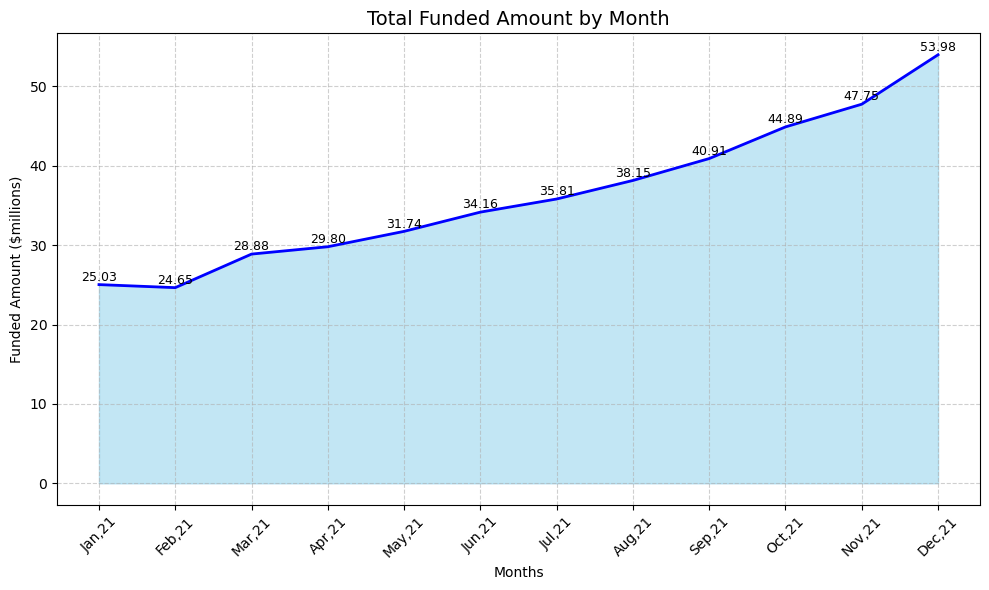

In [144]:
monthly_funded =(df.sort_values('issue_date')
                 .assign(month_name= lambda x:x['issue_date'].dt.strftime('%b,%y'))
                 .groupby('month_name',sort = False )['loan_amount'].sum()
                 .div(1000000)
                 .reset_index(name ='loan_amount_millions'))

plt.figure(figsize = (10,6))
plt.fill_between(monthly_funded['month_name'], monthly_funded['loan_amount_millions'], color='skyblue', alpha=0.5)
plt.plot(monthly_funded['month_name'], monthly_funded['loan_amount_millions'], color='blue', linewidth=2)

for i,row in monthly_funded.iterrows():
    plt.text(i,row['loan_amount_millions'] +0.1, f"{row['loan_amount_millions']:.2f}",
             ha='center', va='bottom', fontsize=9, rotation=0,color='black')

plt.title('Total Funded Amount by Month', fontsize=14)
plt.xlabel('Months')
plt.ylabel('Funded Amount ($millions)')
plt.xticks(ticks=range(len(monthly_funded)), labels=monthly_funded['month_name'], rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

## 2.Monthly Trends by Issue Date for Total Amount Received.


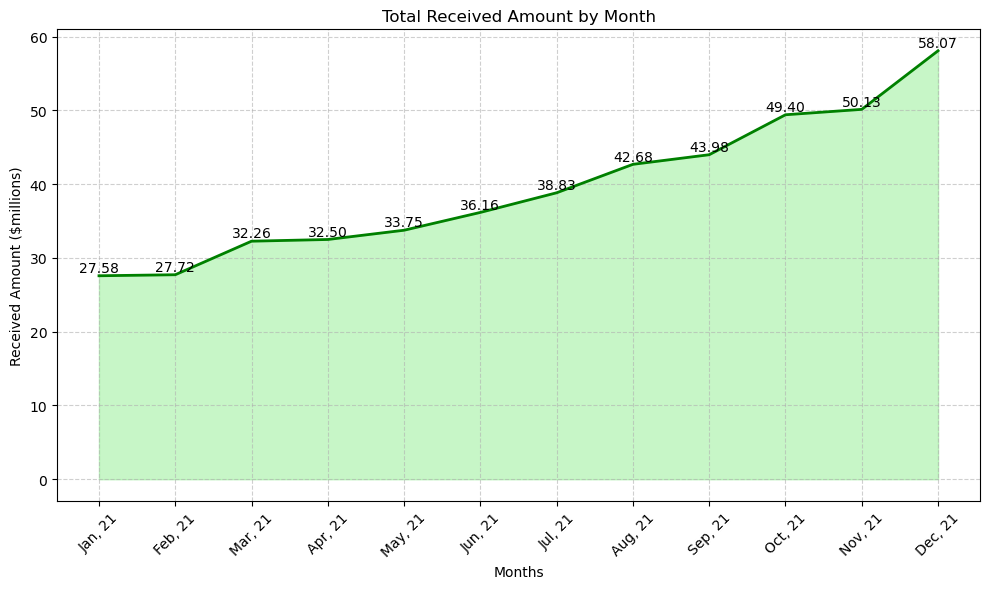

In [15]:
monthly_received_amt =( df.sort_values('issue_date')
                       .assign(month_name = lambda x:x['issue_date'].dt.strftime('%b, %y'))
                       .groupby('month_name',sort= False)['total_payment'].sum()
                       .div(1000000)
                       .reset_index(name='loan_amt_received_m' ))

plt.figure(figsize = (10,6))
plt.fill_between(monthly_received_amt['month_name'],monthly_received_amt['loan_amt_received_m'], color='lightgreen', alpha=0.5)
plt.plot(monthly_received_amt['month_name'],monthly_received_amt['loan_amt_received_m'], color= 'green', linewidth=2)

for i,row in monthly_received_amt.iterrows():
    plt.text(i,row['loan_amt_received_m']+0.1, f"{row['loan_amt_received_m']:.2f}",
            ha='center', va='bottom')

plt.title('Total Received Amount by Month')
plt.xlabel('Months')
plt.ylabel('Received Amount ($millions)')
plt.xticks(ticks=range(len(monthly_received_amt)), labels=monthly_received_amt['month_name'], rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

## 3.Monthly Trends by Total Loan applications

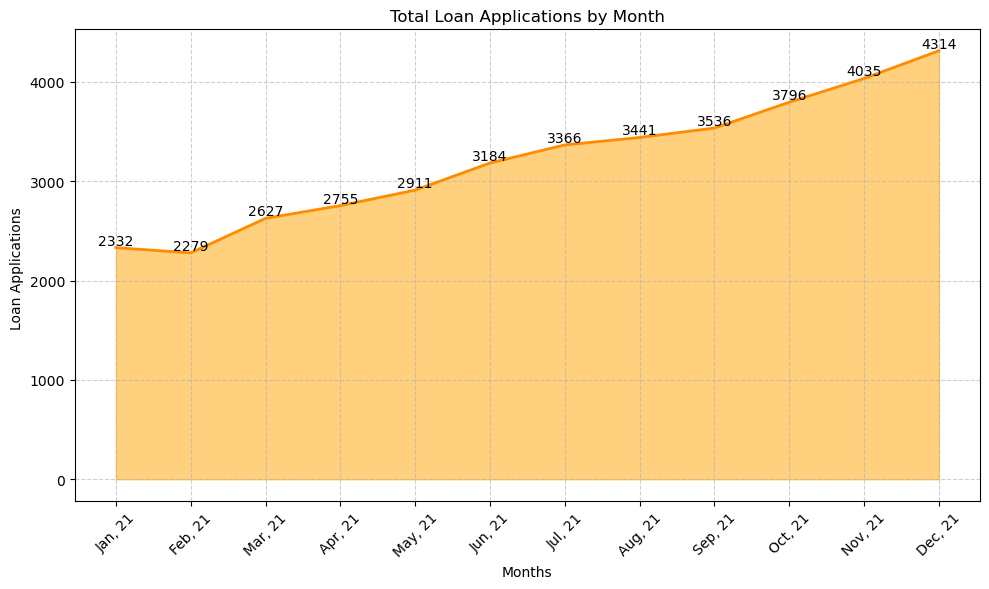

In [146]:
monthly_applicaitons =( df.sort_values('issue_date')
                       .assign(month_name = lambda x:x['issue_date'].dt.strftime('%b, %y'))
                       .groupby('month_name',sort= False)['id'].count()
                       .reset_index(name='total_applicaiotns_count' ))

plt.figure(figsize = (10,6))
plt.fill_between(monthly_applicaitons['month_name'],monthly_applicaitons['total_applicaiotns_count'], color='orange', alpha=0.5)
plt.plot(monthly_applicaitons['month_name'],monthly_applicaitons['total_applicaiotns_count'], color= 'darkorange', linewidth=2)

for i,row in monthly_applicaitons.iterrows():
    plt.text(i,row['total_applicaiotns_count']+0.1, f"{row['total_applicaiotns_count']}",
            ha='center', va='bottom')

plt.title('Total Loan Applications by Month')
plt.xlabel('Months')
plt.ylabel('Loan Applications ')
plt.xticks(ticks=range(len(monthly_applicaitons)), labels=monthly_applicaitons['month_name'], rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

## 1.Regional Trend Analysis by State for Totoal Funded Amount

In [147]:
df.head()

,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,...,sub_grade,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
0,1077430,GA,INDIVIDUAL,< 1 year,Ryder,C,RENT,2021-02-11,2021-09-13,2021-04-13,...,C4,60 months,Source Verified,30000.0,0.0100,59.83,0.1527,2500,4,1009
1,1072053,CA,INDIVIDUAL,9 years,MKC Accounting,E,RENT,2021-01-01,2021-12-14,2021-01-15,...,E1,36 months,Source Verified,48000.0,0.0535,109.43,0.1864,3000,4,3939
2,1069243,CA,INDIVIDUAL,4 years,Chemat Technology Inc,C,RENT,2021-01-05,2021-12-12,2021-01-09,...,C5,36 months,Not Verified,50000.0,0.2088,421.65,0.1596,12000,11,3522
3,1041756,TX,INDIVIDUAL,< 1 year,barnes distribution,B,MORTGAGE,2021-02-25,2021-12-12,2021-03-12,...,B2,60 months,Source Verified,42000.0,0.0540,97.06,0.1065,4500,9,4911
4,1068350,IL,INDIVIDUAL,10+ years,J&J Steel Inc,A,MORTGAGE,2021-01-01,2021-12-14,2021-01-15,...,A1,36 months,Verified,83000.0,0.0231,106.53,0.0603,3500,28,3835


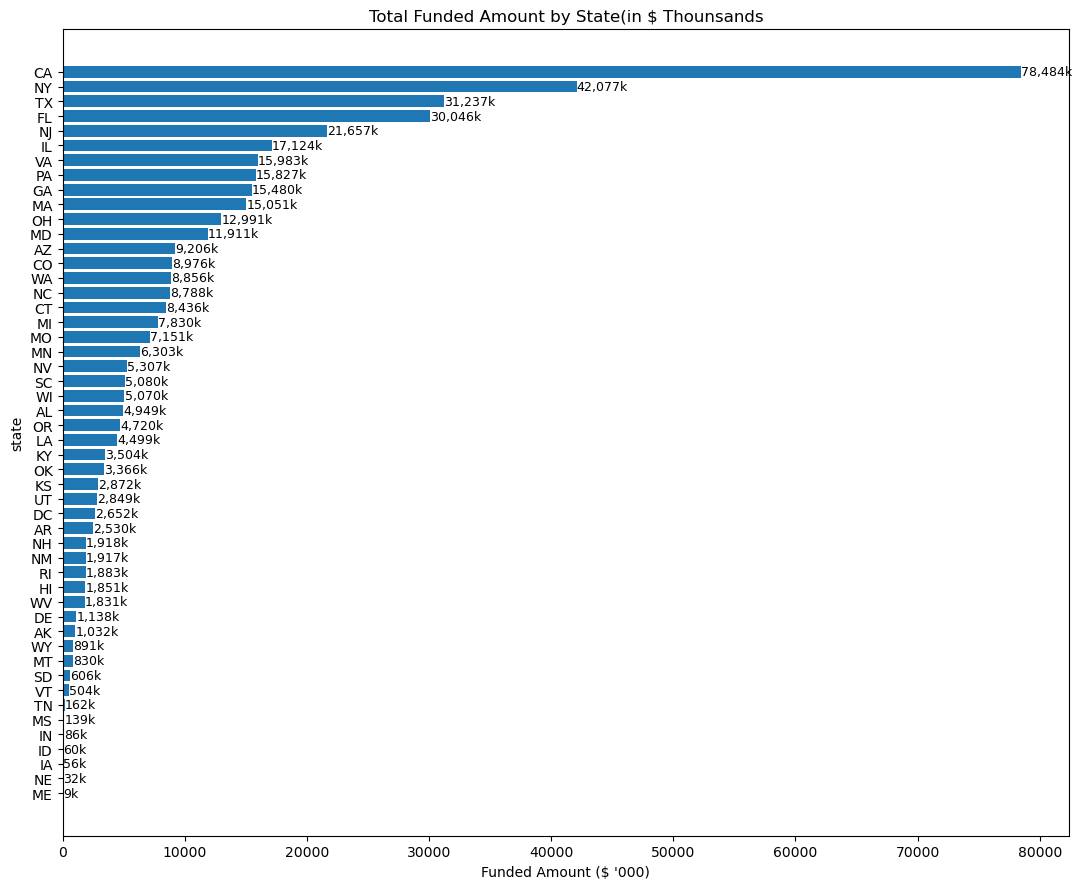

In [27]:
state_funding = df.groupby('address_state')['loan_amount'].sum().sort_values(ascending= True)
state_funding_thousands= state_funding/1000

plt.figure(figsize=(11,9))
bars= plt.barh(state_funding_thousands.index, state_funding_thousands.values,)
for bar in bars:
   width = bar.get_width()
   plt.text(width+10, bar.get_y() + bar.get_height()/2,
             f'{width:,.0f}k', va='center', fontsize=9)

plt.title("Total Funded Amount by State(in $ Thounsands)")
plt.xlabel('Funded Amount ($ \'000)')
plt.ylabel('state')
plt.tight_layout()
plt.show()

## 2.Regional Trend Analysis by State for Total Received Amount

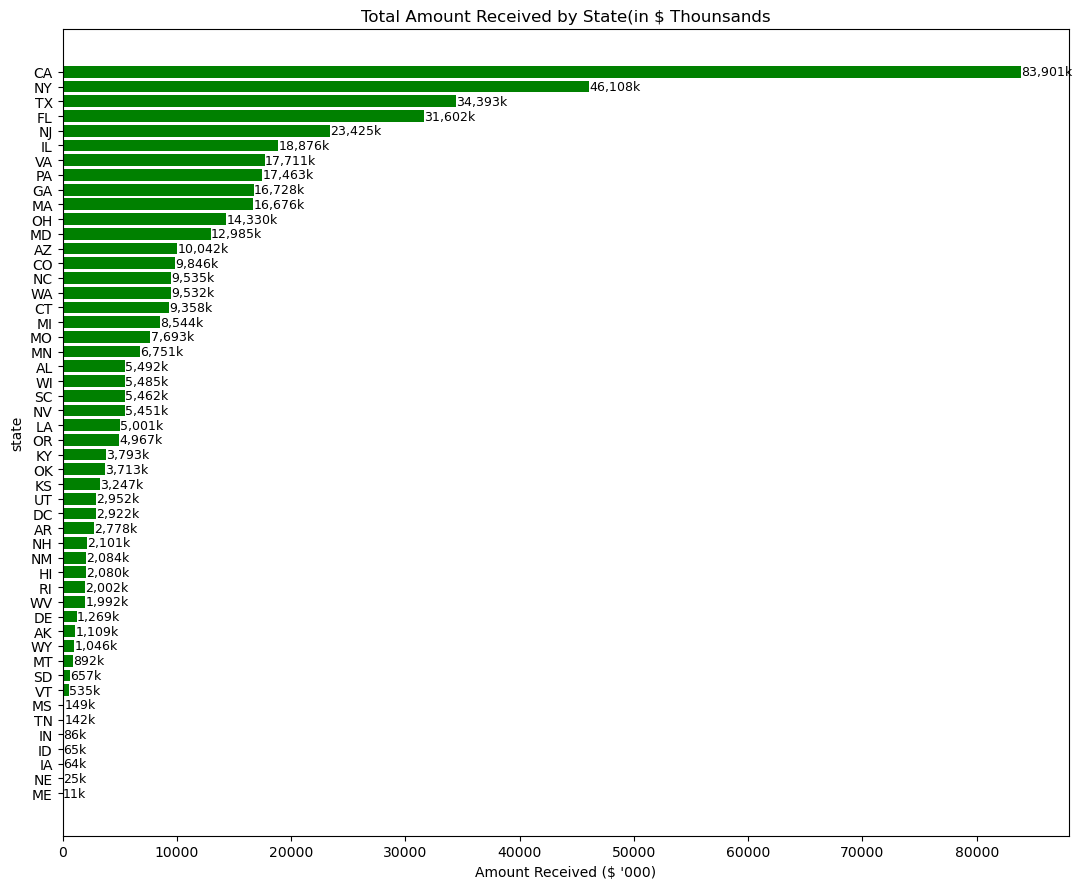

In [28]:
received_anount = df.groupby('address_state')['total_payment'].sum().sort_values(ascending= True)
received_anount_millions= received_anount/1000

plt.figure(figsize=(11,9))
bars= plt.barh(received_anount_millions.index, received_anount_millions.values, color='green')
for bar in bars:
   width = bar.get_width()
   plt.text(width+10, bar.get_y() + bar.get_height()/2,
             f'{width:,.0f}k', va='center', fontsize=9)

plt.title("Total Amount Received by State(in $ Thounsands")
plt.xlabel('Amount Received ($ \'000)')
plt.ylabel('state')
plt.tight_layout()
plt.show()

### 3.Regional Trend Analysis by State for Total Loan Applicaitons

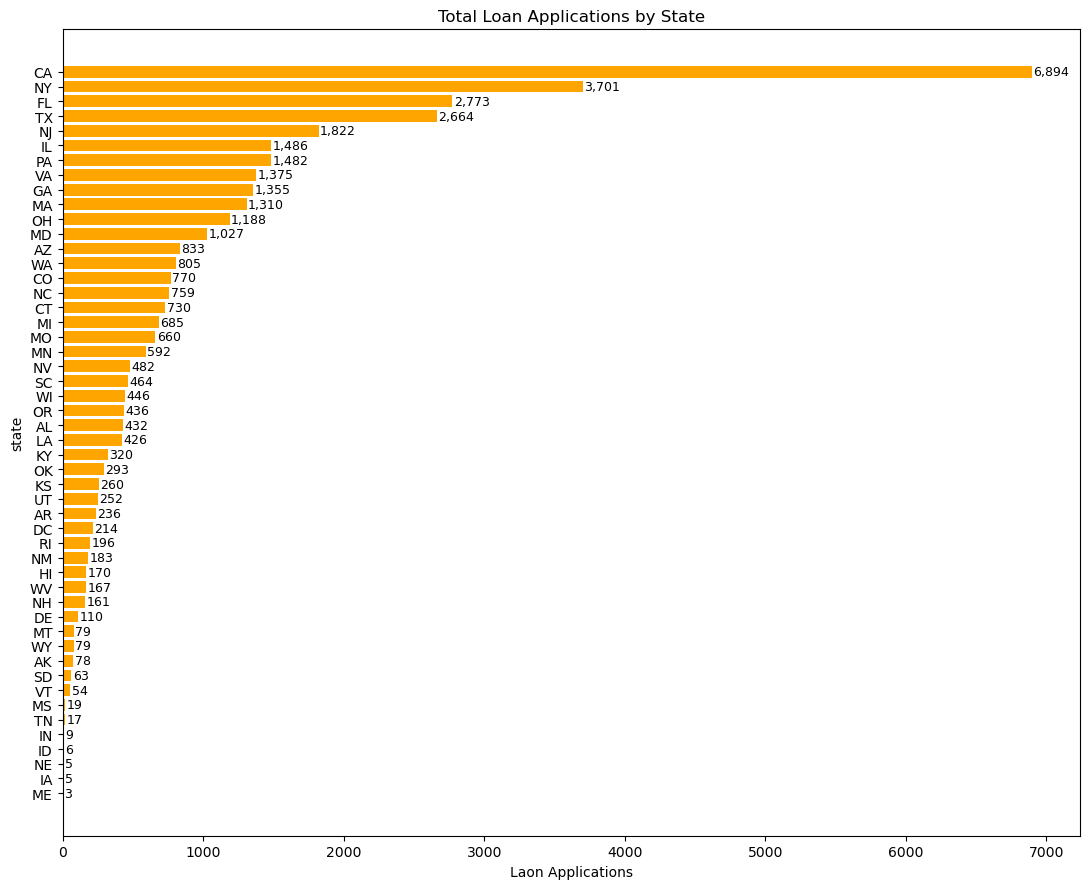

In [47]:
loan_applications = df.groupby('address_state')['id'].count().sort_values(ascending= True)

plt.figure(figsize=(11,9))
bars= plt.barh(loan_applications.index, loan_applications.values, color='orange')
for bar in bars:
   width = bar.get_width()
   plt.text(width+10, bar.get_y() + bar.get_height()/2,
             f'{width:,.0f}', va='center', fontsize=9)

plt.title("Total Loan Applications by State")
plt.xlabel('Laon Applications')
plt.ylabel('state')
plt.tight_layout()
plt.show()

## 1.Loan Term Analysis by Total Funded Amount

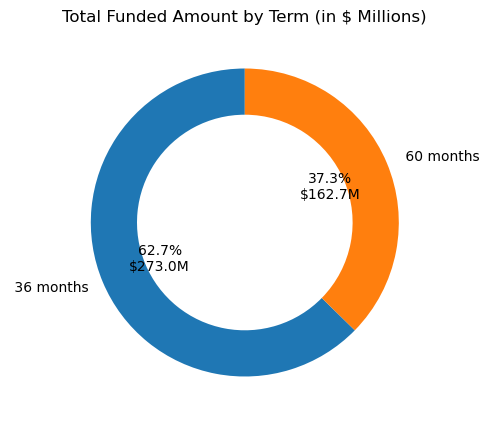

In [74]:
term_funding_millions = df.groupby('term')['loan_amount'].sum()/1000000

plt.figure(figsize=(5,5))
plt.pie(term_funding_millions,
        labels =term_funding_millions.index, 
        autopct = lambda p:f"{p:.1f}%\n${p*sum(term_funding_millions)/100:.1f}M",
        startangle=90,
        wedgeprops={'width': 0.3}
)
plt.title("Total Funded Amount by Term (in $ Millions)")
plt.show()

## 2.Loan Term Analysis by Total Amount Received

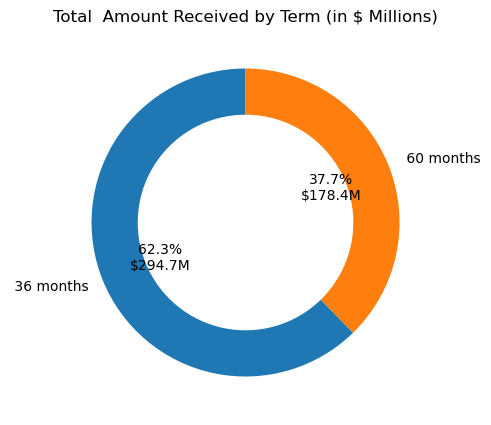

In [76]:
term_amt_received_millions = df.groupby('term')['total_payment'].sum()/1000000

plt.figure(figsize=(5,5))
plt.pie(term_amt_received_millions,
        labels =term_amt_received_millions.index, 
        autopct = lambda p:f"{p:.1f}%\n${p*sum(term_amt_received_millions)/100:.1f}M",
        startangle=90,
        wedgeprops={'width': 0.3}
)
plt.title("Total  Amount Received by Term (in $ Millions)")
plt.show()

## 3.Loan Term Analysis by Total Amount Received

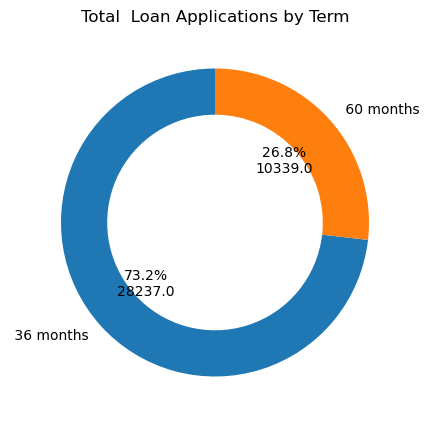

In [79]:
term_Appications_millions = df.groupby('term')['id'].count()

plt.figure(figsize=(5,5))
plt.pie(term_Appications_millions,
        labels =term_Appications_millions.index, 
        autopct = lambda p:f"{p:.1f}%\n{p*sum(term_Appications_millions)/100:.1f}",
        startangle=90,
        wedgeprops={'width': 0.3}
)
plt.title("Total  Loan Applications by Term")
plt.show()

## 1.Employee Length by Total Funded Amount

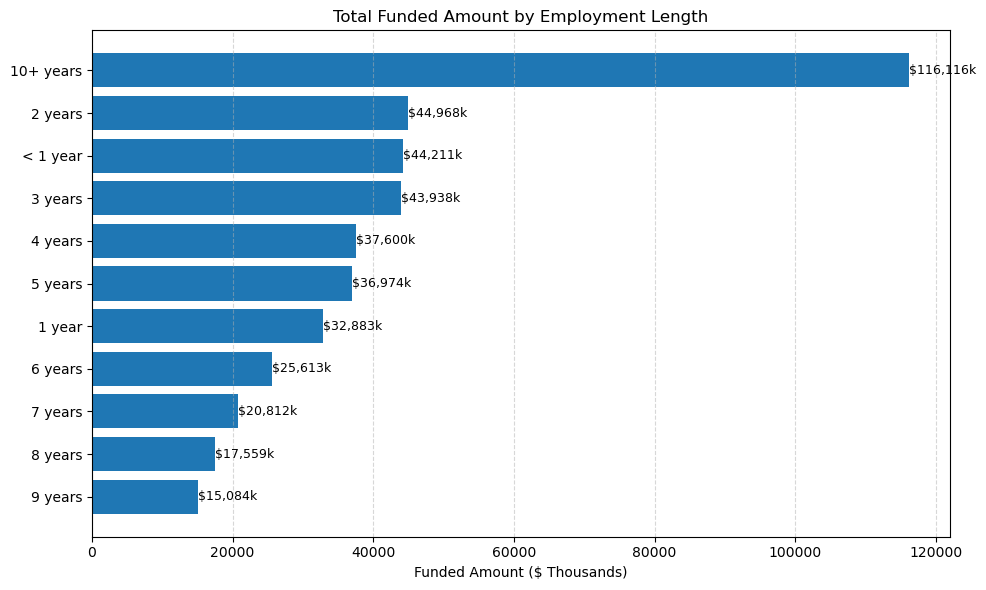

In [92]:
emp_funding = df.groupby('emp_length')['loan_amount'].sum().sort_values()/1000

plt.figure(figsize =(10,6))
bars = plt.barh(emp_funding.index, emp_funding)

for bar in bars:
    width = bar.get_width()
    plt.text(width+5, bar.get_y() + bar.get_height() /2,
             f"${width:,.0f}k", va='center', fontsize=9)

plt.xlabel("Funded Amount ($ Thousands)")
plt.title("Total Funded Amount by Employment Length")
plt.grid(axis='x', linestyle= '--', alpha=0.5)
plt.tight_layout()
plt.show()

## 2.Employee Length by Total Received Amount

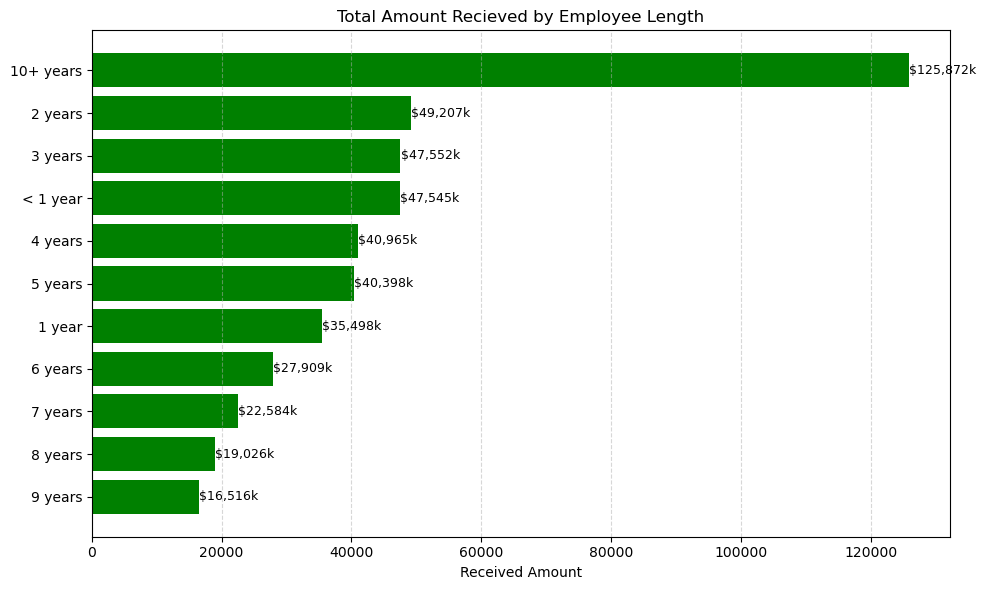

In [132]:
emp_recievd_amt = df.groupby('emp_length')['total_payment'].sum().sort_values()/1000

plt.figure(figsize =(10,6))
bars = plt.barh(emp_recievd_amt.index, emp_recievd_amt, color= 'green')

for bar in bars:
    width = bar.get_width()
    plt.text(width+5, bar.get_y() + bar.get_height() /2,
             f"${width:,.0f}k", va='center', fontsize=9)

    
plt.title('Total Amount Recieved by Employee Length')
plt.xlabel("Received Amount")
plt.grid(axis='x', linestyle= '--', alpha=0.5)
plt.tight_layout()
plt.show()
          

## 3.Total Loan Applications received by Employee length

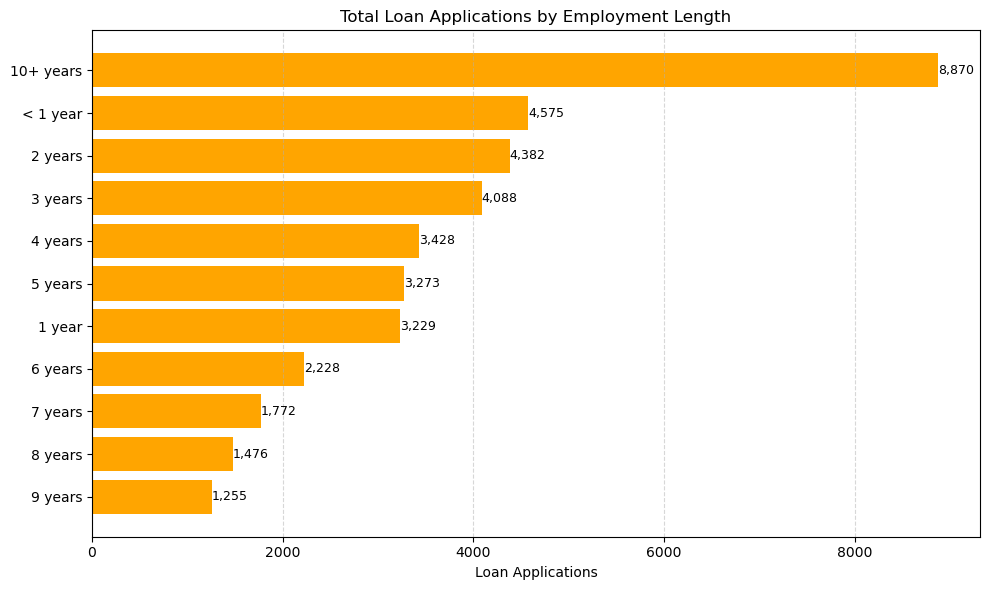

In [129]:
emp_laon_apllications = df.groupby('emp_length')['id'].count().sort_values()

plt.figure(figsize =(10,6))
bars = plt.barh(emp_laon_apllications.index, emp_laon_apllications, color= 'orange')

for bar in bars:
    width = bar.get_width()
    plt.text(width+0.1, bar.get_y() + bar.get_height() /2,
             f"{width:,.0f}", va='center', fontsize=9)

plt.xlabel("Loan Applications")
plt.title("Total Loan Applications by Employment Length")
plt.grid(axis='x', linestyle= '--', alpha=0.5)
plt.tight_layout()
plt.show()

## 1.Laon Purpose by Total Funded Amount

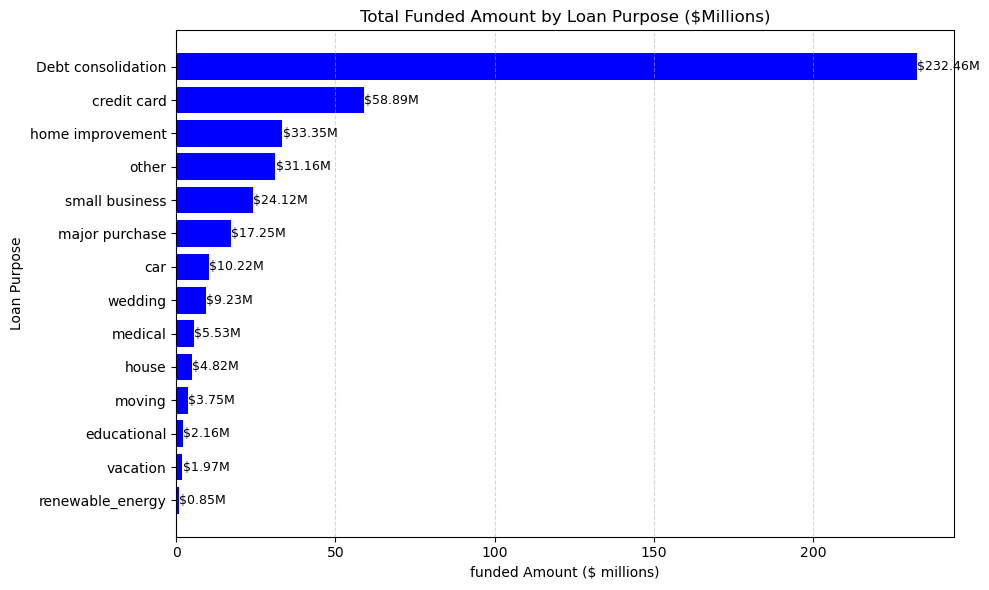

In [5]:
purpose_funding_millions= df.groupby('purpose')['loan_amount'].sum().sort_values()/1000000

plt.figure(figsize = (10,6))
bars = plt.barh(purpose_funding_millions.index,purpose_funding_millions, color ='blue')
for bar in bars:
    width = bar.get_width()
    plt.text(width+0.1, bar.get_y() + bar.get_height()/2,
             f"${width:.2f}M", va = 'center', fontsize=9)

plt.title('Total Funded Amount by Loan Purpose ($Millions)')
plt.xlabel('funded Amount ($ millions)')
plt.ylabel('Loan Purpose')
plt.grid(axis='x', linestyle= '--', alpha=0.5)
plt.tight_layout()
plt.show()

## 2.Laon Purpose by Total Amount Received

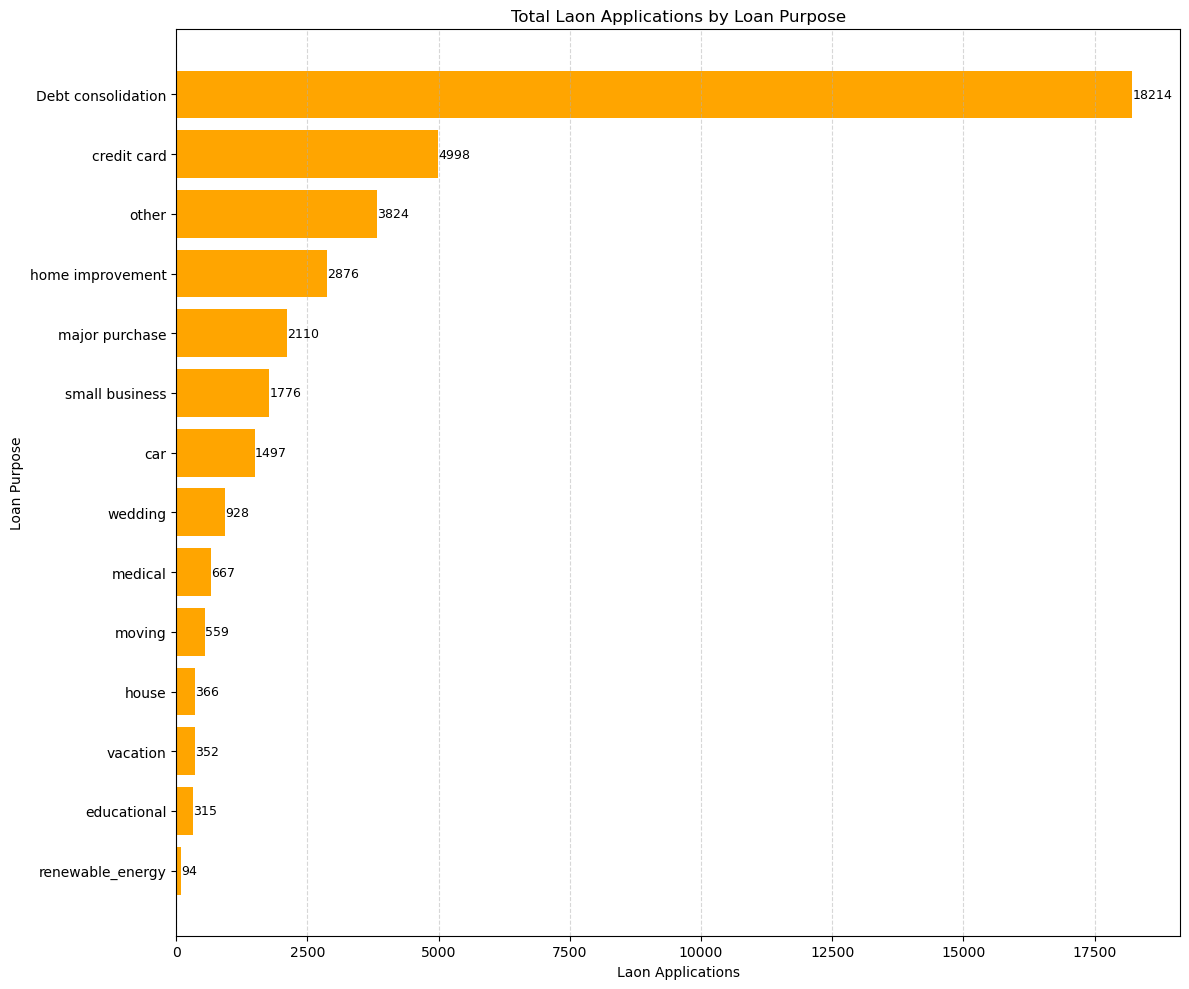

In [10]:
purpose_applications= df.groupby('purpose')['id'].count().sort_values()

plt.figure(figsize = (12,10))
bars = plt.barh(purpose_applications.index,purpose_applications, color ='orange')
for bar in bars:
    width = bar.get_width()
    plt.text(width+0.1, bar.get_y() + bar.get_height()/2,
             f"{width}", va = 'center', fontsize=9)

plt.title('Total Laon Applications by Loan Purpose')
plt.xlabel('Laon Applications')
plt.ylabel('Loan Purpose')
plt.grid(axis='x', linestyle= '--', alpha=0.5)
plt.tight_layout()
plt.show()

## Home Owner ship by Funded Amount

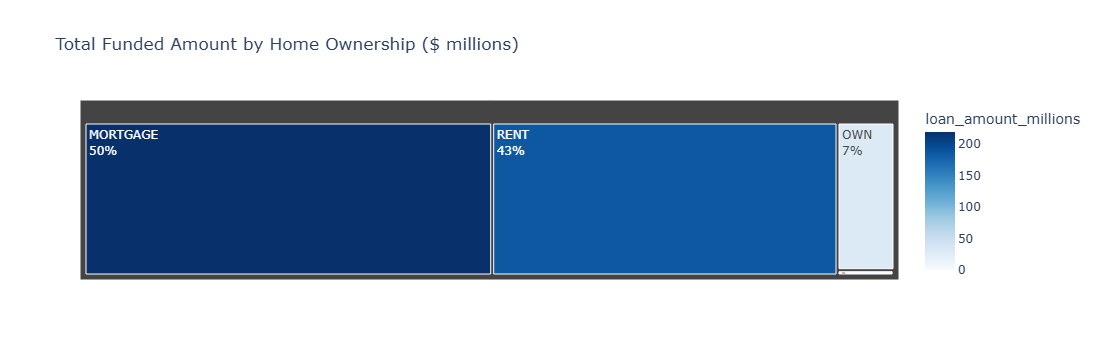

In [45]:
home_funded =df.groupby('home_ownership')['loan_amount'].sum().reset_index()
home_funded['loan_amount_millions'] = home_funded['loan_amount']/1000000

fig = px.treemap(
    home_funded,
    path= ['home_ownership'] ,
    values = 'loan_amount_millions',
    color = 'loan_amount_millions',
    color_continuous_scale = 'Blues',
    title='Total Funded Amount by Home Ownership ($ millions)'
)
fig.update_traces(textinfo="label+percent parent")
fig.show()

## Home Ownership by Loan Applications

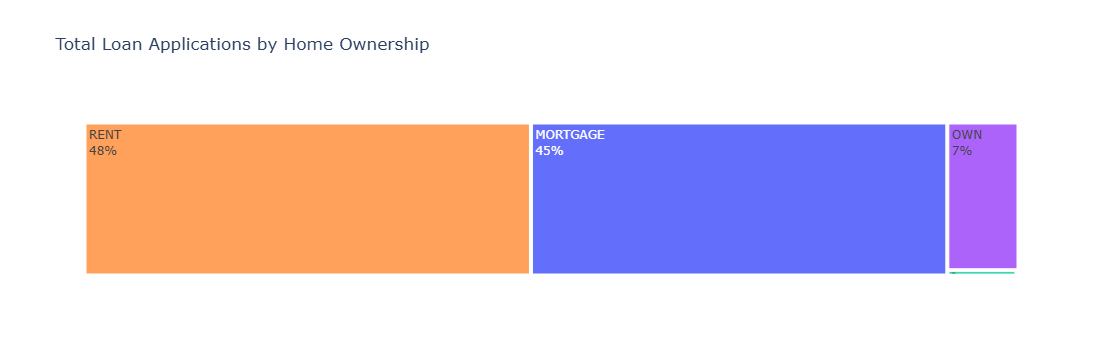

In [51]:
home_applications =df.groupby('home_ownership')['id'].count().reset_index()

fig = px.treemap(
    home_applications,
    path= ['home_ownership'] ,
    values = 'id',
    color = 'id',
    title='Total Loan Applications by Home Ownership',
)
fig.update_traces(textinfo="label+percent parent")
fig.show()

In [28]:
home_applications =df.groupby('home_ownership')['id'].count().reset_index()
home_applications

,home_ownership,id
0,MORTGAGE,17198
1,NONE,3
2,OTHER,98
3,OWN,2838
4,RENT,18439
